# GWAS Tutorial - MSc Bioinformatics 2022

Welcome to the GWAS tutorial. Today you will use PLINK2 to perform a Genome Wide Association Study and create and assess a Manhattan plot.

This tutorial is based on material from this Github repository, if you are interested you can explore more aspects of GWAS there.
<https://github.com/MareesAT/GWA_tutorial>

### Resources:

Files for tutorial:
https://1drv.ms/u/s!AoSvEIhph2HmhtxgU_M5NeHuJcSdDA?e=kJqtZu

QMPlot library for python
<https://github.com/ShujiaHuang/qmplot>
and tutorial:
<https://nbviewer.org/github/ShujiaHuang/qmplot/blob/main/docs/tutorial.ipynb>

PLINK2
<https://www.cog-genomics.org/plink/2.0/>

AWK manual
<https://www.gnu.org/software/gawk/manual/gawk.html>



## Preparation

1. Create a working directory for the tutorial.
2. Download the files for the tutorial.
3. Download the plink2 (version Alpha 3.7 final (24 Oct)), unzip and place the executable in the working directory.


Association analysis using plink uses several files:
* A map file representing the genetic markers in the study

    ```
    chr      name       cM        position
    1        rs2185539   0         556738
    ```
   
* A file containing the genotypes of the subjects and their relationships

    ```
    FID    IID      F    M    Gender    Affected    Marker1    Marker2  etc
    1     NA06989  0    0       2          1         A  G      C  C
    ```

FID indicates a Family ID, IID indicates an Individual ID, F and M are the IDs of the parents for this subject.  These first two files are represented by the binary files 'triple.bed' and 'triple.bim' in this project
   
* A file describing the phenotypes to be investigated ('complete.phen')

    ```
    FID     IID     TEST    HD      AD      RA      BC      T2D     PS
    1328 NA06989     1       1       2       2       2       1       1
    ```

The FID and IID have to match those in the genotype file, each phenotype in this study has a column with 1 = unaffected and 2 = affected.

* A Covariate file, this is used to compensate for other phenotype or environmental confounders that may explain the genetic variation for the study.

    ```
    FID     IID     Obesity
    1328   NA06989     1
    ```

 

# Part 1

For the first part of this tutorial you will perform a GWAS on one of the following diseases:

AD - Alzheimer's disease

RA - Rheumatoid Arthritis

BC - Breast Cancer

T2D - Type 2 Diabetes

PS - Psoriasis

Pick one of these and run the following command in the linux command line:

`./plink2 --bfile triple --glm  allow-no-covars --pheno complete.phen --pheno-name RA --out RA
`

substituting your chosen disease into `--pheno-name` and choosing an appropriate output name.

The output file will be named similar to: `RA.RA.glm.logistic.hybrid`

explore this file and using the plink manual see if you can identify the p-value for the association between a marker and the disease.

Find the markers with the highest significance (i.e smallest p-value), one way to do this is to use AWK, which is a powerful scripting language for manipulating text files.

`awk '{if ($13 < 0.001) print $0}' T2D.T2D.glm.logistic.hybrid`

`$13` indicates column 13 in the text file.
`print $0` indicates to print the whole line that matches the if statement.


# Part 2

Finding the significant markers straight from the text file is useful, but makes it difficult to visualise the overal pattern of association. A common way to visualise association data is to use a Manhattan plot and example is below, each marker is represented as dot with the x-axis being its position along the genome and the y-axis being the -log<sub>10</sub>(p-value)

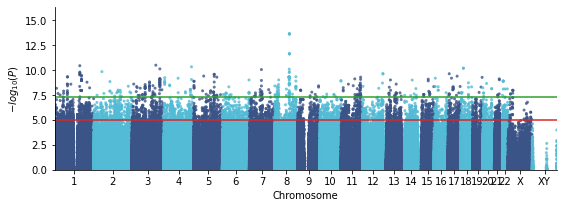

In [29]:
ax = manhattanplot(data=df)

In this part you will create a Manhattan plot for the GWAS you created in part 1 using Python, Pandas and QMPlot.

The Pandas library cannot use data that is mixed between text and numbers, so first we will need to clean the file:
`awk '!/'NA'/' T2D.T2D.glm.logistic.hybrid > T2D.hybrid`
This removes any lines in the file that do not have a P-value.

In this next section I will show you the Python commands to create a basic Manhattan plot.

you will need to install the following libraries:

pandas, matplotlib, qmplot


In [5]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
from qmplot import manhattanplot, qqplot

In [26]:
# read the output from plink2 into a panda dataframe
df = pd.read_table("T2D.T2D.glm.logistic.hybrid", sep="\t")
df = df.dropna(how="any", axis=0) #occasionally needed to further process the file


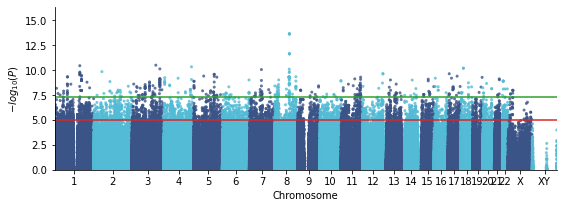

In [29]:
# create the plot
#ax = manhattanplot(data=df)
ax = manhattanplot(data=df)


Using the qmplot manual (https://github.com/ShujiaHuang/qmplot) add the IDs of the most significant markers.

Find these markers in a genome browser (NCBI/UCSC/ENSEMBL).
Are there any genes close by?
Do they make good candidates to be the potential cause of your chosen disease?


# Part 3

Now you have performed a simple GWAS and plotted the Manhattan plot, lets now look at covariates.

1. Perform a GWAS as before but with the phenotype HD (Heart Disease)
2. create a Manhattan plot and identify the most significant markers.
3. Are there any potential candidate genes nearby?


HD.cov includes a covariate phenotype 'obesity'.
run plink2 again with the HD phenotype, but this time include the covariate file.

`./plink2 --bfile triple --glm  --pheno complete.phen --pheno-name HD --covar hd.cov  --out HDCov`

Examine the output file is it the same as before?

You will notice that there are additional lines present in the TEST column for the covariate.
See if you can use AWK to create a file without these lines as you only need the p-values for the affect of the markers on the disease.

Create a Manhattan plot with this new file.

1. Are there any differences between this and the plot without the covariate analysis?
2. How might these differences be explained?

## End of the Tutorial